# Descriptive Statistics with Python and R


## Index:
* [Data-set](#1)
* [Selecting](#2)
* [Sampling](#3)
* [Filtering](#4)
* [Mutate](#5)
* [Arrange](#6)
* [Rename](#7)
* [Gather](#8)
* [Spread](#9)
* [Separate](#10)
* [Unite](#11)
* [Joins](#12)
* *  [Inner Join](#13)
* * [Full Join](#14)
* * [Left Join](#15)
* * [Right Join](#16)
* * [Semi Join](#17)
* * [Anti Join](#18)
* * [Union](#19)
* * [Intersect](#20)
* * [Difference](#21)
*  [Concatenate](#22)
*  [Group and Summarize](#23)
*  [Other usuful functions ](#24)

## Data-Set <a class="anchor" id="1"></a>

We load the data-set with which we are going to work mainly:

### Working with `Python`:

In [2]:
import pandas as pd
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

We load the data-set that we will use in this article using the following link:

https://raw.githubusercontent.com/FabioScielzoOrtiz/Estadistica4all-blog/main/Descriptive%20Statisitcs%20in%20Python%20and%20R/datosAragon.csv

In [3]:
url = 'https://raw.githubusercontent.com/FabioScielzoOrtiz/Estadistica4all-blog/main/Descriptive%20Statisitcs%20in%20Python%20and%20R/datosAragon.csv'

data_Python = pd.read_csv(url)

data_Python

,ca,datosECVmas16.prov,nomprov,gen,edad,nac,neduc,sitlab,ingnorm,horas,factorel
0,2,22,Huesca,1,3,1,3,1,21237.1,36.42,393.7
1,2,22,Huesca,2,2,1,2,1,17810.8,31.72,393.7
2,2,22,Huesca,1,1,1,2,1,11889.1,31.88,393.7
3,2,22,Huesca,1,1,1,2,1,16000.5,38.18,393.7
4,2,22,Huesca,1,1,1,2,3,21169.6,0.00,393.7
...,...,...,...,...,...,...,...,...,...,...,...
1231,2,50,Zaragoza,1,2,1,2,1,11760.6,28.79,2206.1
1232,2,50,Zaragoza,1,2,1,2,2,19321.6,0.00,124.4
1233,2,50,Zaragoza,2,2,1,2,1,19924.8,37.21,124.4
1234,2,50,Zaragoza,2,3,1,1,3,13042.5,0.00,246.5


Throughout this article we will use the Python package `dfply`

In [4]:
# pip install dfply 

from dfply import *

We prepare the data-set:

We select the columns that we will use:

In [5]:
data_Python = (data_Python.T >> row_slice( list(range(2,10)) ) ).T

data_Python

,nomprov,gen,edad,nac,neduc,sitlab,ingnorm,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.0
...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79
1232,Zaragoza,1,2,1,2,2,19321.6,0.0
1233,Zaragoza,2,2,1,2,1,19924.8,37.21
1234,Zaragoza,2,3,1,1,3,13042.5,0.0


We rename some of these columns:

In [6]:
data_Python = data_Python >> rename( genero=X.gen , 
                              provincia=X.nomprov , 
                              ingresos=X.ingnorm ) 
    
data_Python

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.0
...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79
1232,Zaragoza,1,2,1,2,2,19321.6,0.0
1233,Zaragoza,2,2,1,2,1,19924.8,37.21
1234,Zaragoza,2,3,1,1,3,13042.5,0.0


We can see the structure of the variables of our data-set:

In [7]:
data_Python.dtypes

provincia    object
genero       object
edad         object
nac          object
neduc        object
sitlab       object
ingresos     object
horas        object
dtype: object

We will convert the structure of them in the following way:

- ingresos and horas to 'int' (numeric)

- The rest to 'category' (categorical)

In [8]:
data_Python['ingresos'] = data_Python['ingresos'].astype(float) 
data_Python['horas'] = data_Python['horas'].astype(float) 

data_Python['genero'] = data_Python['genero'].astype('category')
data_Python['edad'] = data_Python['edad'].astype('category')
data_Python['nac'] = data_Python['nac'].astype('category')
data_Python['neduc'] = data_Python['neduc'].astype('category')
data_Python['sitlab'] = data_Python['sitlab'].astype('category')
data_Python['provincia'] = data_Python['provincia'].astype('category')

Now we check if changes have been done correctly:

In [9]:
data_Python.dtypes 

provincia    category
genero       category
edad         category
nac          category
neduc        category
sitlab       category
ingresos      float64
horas         float64
dtype: object

In [10]:
data_Python

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.00
...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79
1232,Zaragoza,1,2,1,2,2,19321.6,0.00
1233,Zaragoza,2,2,1,2,1,19924.8,37.21
1234,Zaragoza,2,3,1,1,3,13042.5,0.00


### Working with `R`

To work with R inside Python we will use the Python package `rpy2`

In [11]:
# pip install rpy2

import rpy2

%load_ext rpy2.ipython

import rpy2.robjects as robjects

Unable to determine R home: [WinError 2] El sistema no puede encontrar el archivo especificado


We prepare the data-set:

In [12]:
%%R

library(tidyverse)

url = 'https://raw.githubusercontent.com/FabioScielzoOrtiz/Estadistica4all-blog/main/Descriptive%20Statisitcs%20in%20Python%20and%20R/datosAragon.csv'

data_R <- read_csv(url)

data_R <- data_R %>% select(3:10)

data_R <- data_R %>% rename("genero"="gen",
         "provincia"="nomprov", "ingresos"="ingnorm")

data_R <- as.data.frame(data_R)

R[write to console]: -- Attaching packages --------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

R[write to console]: -- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Rows: 1236 Columns: 11
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): nomprov
dbl (10): ca, datosECVmas16.prov, gen, edad, nac, neduc, sitlab, ingnorm, ho...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
%%R

head(data_R)

  provincia genero edad nac neduc sitlab ingresos horas
1    Huesca      1    3   1     3      1  21237.1 36.42
2    Huesca      2    2   1     2      1  17810.8 31.72
3    Huesca      1    1   1     2      1  11889.1 31.88
4    Huesca      1    1   1     2      1  16000.5 38.18
5    Huesca      1    1   1     2      3  21169.6  0.00
6    Huesca      1    2   1     2      1  16001.3 34.52


## Data-set Description  

The definition of the variables are the following:

-   **provincia**: indicates the province of the Aragon community which belong the sample individuals.

-   **genero**: indicates the sex of the sample individuals. Take 1 if it's male and 2 if it's female.

-   **edad**: indicates the age range of the sample individuals.
    Take 1 if age is between 16 and 24 ages,  2 if age is between 25 and 49 ages, and 3 if age is between 50 and 64 ages, and 4 if age is greater or equal than 65 ages.

-   **nacionalidad** (**nac**): indicates the nacionality of the sample individuals. If they are from Spain, it takes 1, and if they are from other country, it takes 2.

-   **situacion laboral** (**sitlab**): indicates the labor situation of the sample individuals. It takes 1 if they are working, 2 if they are unemployed, and 3 if they are inactive.

-   **ingresos** : indicates the incomes of the individuals in the sample.

-   **horas** : indicates the number of working hours of the individuals in the sample.
-   **neduc** : indicates the education level  of the individuals in the sample. It takes 1 if they have low education level, 2 if they have intermediate education level, and 3 if they have high education level. 
  

## Statistical Variable <a class="anchor" id="2"></a>

$$
X_k= \begin{pmatrix}
x_{1k} \\
x_{2k}\\
... \\
x_{nk} 
\end{pmatrix} 
$$

is a **statistical variable** because is a vector with the values or observations of  variable $X_k$ for $n$ elements or individuals of a sample.  

Where:  $x_{ik}$  is the value or observation of  $X_k$ variable for the $i$ element of the sample.

## Data Martrix   <a class="anchor" id="3"></a>

In general, if we have observed $p$ variables on a sample $\varepsilon$ with $n$ elements/individuals ,

The data matrix $X$  of the variables $X_1,...,X_p$ measurements on the sample is:

$$
X= \begin{pmatrix}
x_{11} & x_{12}&...&x_{1p}\\
x_{21} & x_{22}&...&x_{2p}\\
...&...&...&...\\
x_{n1}& x_{n2}&...&x_{np}
\end{pmatrix}
$$

Note:  &nbsp;   $X$ is a matrix $nxp$

## Data Martrix Representation by Rows   <a class="anchor" id="4"></a>

$$
X= \begin{pmatrix}
x_{1}^{t} \\
x_{2} ^t \\
... \\
x_{n} ^t 
\end{pmatrix}
$$

Where:

$x_i ^t = (x_{i1}, x_{i2}, ..., x_{ip} )$ is the vector with the values of the $p$ variables $X_1,...,X_p$ for the $i$ element/individual  of the sample, for $i=1,...,n$

## Data Martrix Representation by Columns   <a class="anchor" id="5"></a>


We can express:

$$
X= (X_1 , X_2 ,..., X_p )
$$

Where: 
$$
X_k= \begin{pmatrix}
x_{1k} \\
x_{2k}\\
... \\
x_{nk} 
\end{pmatrix} 
$$

for $k=1,2,...,p$


## Range of a Statistical Variable   <a class="anchor" id="6"></a>



The **range** of a statistical variable  $X_k$ is the set of values that can be taken by the variable. 


Depending on the variable range we can define if the variable is **quantitative** or **categorical** . Clasification that has a particular relevance in statistics.

<br /> 

Examples:

 
$X_k =$ Incomes of 1000 employees of Amazon  &nbsp; $\Rightarrow$  &nbsp;
$Range(X_k) =[0, \infty )$

 
$X_k =$ brand of the car of 50 footballers &nbsp; $\Rightarrow$  &nbsp;
$Range(X_k) = \lbrace Mercedes, Audi, ... \rbrace$

 
$X_k =$ Number of houses of 10 urbanizations  &nbsp; $\Rightarrow$  &nbsp;
$Range(X_k) = \lbrace 0, 1, 2,... \rbrace$

## Types of Statistical Variable   <a class="anchor" id="7"></a>



The variable $X_k$ is **quantitative** if the elements of it´s range are
conceptually numbers.

The variable $X_k$ is **categorical** if the elements of it´s range aree labels or categories (they can be numbers at a symbolic level but not at a conceptual level)


### Types of Quantitative Variables <a class="anchor" id="8"></a>


 

#### Discrete and Continuous Variables <a class="anchor" id="9"></a>
 

Let $X_k$ a **quantitative** variable ,

 

The variable $X_k$ is **discrete** if it´s range is a numerable set .

The variable $X_k$ is **continuous** if it´s range isn´t a numerable set. 

<br /> 

**Note:**

In particular, variables whose  **range** is a **finite** set
will be **discrete**.

variables whose  **range** isn´t a **finite** set
will be **continuous**.

 <br /> 

### Types of Categorical Variables   <a class="anchor" id="10"></a>

Let $X_k$ a **categorical** variable ,

$X_k$ is **r-aria** if it´s range has **r** elements that are categories or labels.

In Statistics **binary** (2-aria) categorical variables are particularly important.
 

 

#### Nominal and Ordinal Variables <a class="anchor" id="11"></a>


Let $X_k$ a  $r$-aria **categorical** variable ,

The variable $X_k$ is **nominal** if **there is no ordering** between the $r$ categories of it´s range.

The variable $X_k$ is **ordinal** if **there is ordering** between the $r$ categories of it´s range.

 <br /> 

**Examples:**  

$Range(X_k)= \lbrace Apple , Samsung, Oppo \rbrace \Rightarrow X_k$
is nominal 

$Range(X_k)= \lbrace mal , regular, bien \rbrace \Rightarrow X_k$ is
  ordinal



## Descriptive Statistic   <a class="anchor" id="11"></a>

A descriptive statistic is a function of a sample elements.

In general, all function applied on a statistical variable is a statistic.

 
We will see some of  most important statistics.
 

 

### Mean   <a class="anchor" id="12"></a>

 

The arithmetic mean (or simply mean) of a variable $X_k$ is defined as: 

$$
\overline{X_k}=  \frac{1}{n} \cdot \sum_{i=1}^{n} x_{ik} 
$$

 
**Some Properties:**

$$
\sum_{i=1}^{n} \left( x_{ik} - \overline{X_k} \right) = 0
$$
  


#### Mean in R   <a class="anchor" id="12"></a>


In [14]:
%%R
head(data_R)

  provincia genero edad nac neduc sitlab ingresos horas
1    Huesca      1    3   1     3      1  21237.1 36.42
2    Huesca      2    2   1     2      1  17810.8 31.72
3    Huesca      1    1   1     2      1  11889.1 31.88
4    Huesca      1    1   1     2      1  16000.5 38.18
5    Huesca      1    1   1     2      3  21169.6  0.00
6    Huesca      1    2   1     2      1  16001.3 34.52


One way to compute the mean of a variable in R:

In [15]:
%%R
mean(data_R$ingresos)

[1] 14078.77



#### Mean in Python   <a class="anchor" id="12"></a>





In [16]:
data_Python >> head()

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.00


One way to compute the mean of a variable in Python:

In [17]:
data_Python[['ingresos']].mean() 

ingresos    14078.766909
dtype: float64

Another way:

In [18]:
( data_Python >> select(X.ingresos) ).mean() 

ingresos    14078.766909
dtype: float64


### Mean Vector   <a class="anchor" id="12"></a>

Given a data matrix $X$ of size $nxp$,

The means vector of $X$ is: 
$$
\overline{X}=( \overline{X_1} , \overline{X_2} , ... , \overline{X_p} ) ^t
$$



### Mean Vector in Python  <a class="anchor" id="12"></a>


We can also compute the mean of each variable of a data-set in a easy way:

In [19]:
data_Python.mean()

ingresos    14078.766909
horas          16.922532
dtype: float64

### Mean Vector in R  <a class="anchor" id="12"></a>

In [20]:
%%R

colMeans(data_R[ , 2:length(data_R)])

      genero         edad          nac        neduc       sitlab     ingresos 
    1.502427     2.555016     1.046117     1.805016     1.978155 14078.766909 
       horas 
   16.922532 




#### Matrix Expression of the Mean Vector   <a class="anchor" id="12"></a>

The matrix expression of means vector of $X$ is:
 
$$
\overline{X}= \dfrac{1}{n} \cdot X\hspace{0.05cm}^t \cdot \overrightarrow{1}_{nx1}
$$





### Ponderate Mean   <a class="anchor" id="12"></a>



Given the variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$

Given a weights for each observation of the variable
$X_k$ : $w=(w_1,w_2,...,w_n)^t$

 
The **weighted mean** de la variable $X_k$ con el vector de pesos $w$
es: 
$$
\overline{X_k} (w) =   \dfrac{\sum_{i=1}^{n}  x_{ik}\cdot w_i  }{ \sum_{i=1}^{n}  w_{i} }  
$$





### Geometric Mean   <a class="anchor" id="12"></a>


Given the variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$


The **geometric mean** of the variable $X_k$ is:

$$
\overline{X_k}_{geom} =   \sqrt{\Pi_{i=1}^{n}  x_{ik}} = \sqrt{x_{1k}\cdot x_{2k}\cdot...\cdot x_{nk}} 
$$


### Median  <a class="anchor" id="12"></a>

The **median** of a variable $X_k$ is a values such that half of the observations of  $X_k$ are **less** than that value.

 

Given the variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$


We order their values ​​from smallest to largest:

$x_{(1)k} < x_{(2)k} < ...< x_{(n)k}$

 <br /> 

The median of the variable $X_k$ is:

$$
Median(X_k)=  \left\lbrace\begin{array}{l} \dfrac{ x_{(n/2)k} + x_{(n/2 + 1)k} }{2} \hspace{0.3cm},\text{ if $n$ is  {pair}} \\ x_{(\lceil n/2 \rceil)k} \hspace{0.3cm},\text{   if $n$ is  {odd}  }  \end{array}\right.
$$




#### Median in R   <a class="anchor" id="12"></a>


In [21]:
%%R

median(data_R$ingresos) 

[1] 12331


It can be verified that it is fulfilled the median definition:

In [22]:
%%R

sum(data_R$ingresos < median(data_R$ingresos))/length(data_R$ingresos)

[1] 0.5



#### Median in Python   <a class="anchor" id="12"></a>



In [23]:
( data_Python >> select(X.ingresos) ).median() 

ingresos    12331.0
dtype: float64

In [24]:
data_Python[['ingresos']].median() 

ingresos    12331.0
dtype: float64

In [25]:
data_Python[['ingresos']] < data_Python[['ingresos']].median()

,ingresos
0,False
1,False
2,True
3,False
4,False
...,...
1231,True
1232,False
1233,False
1234,False


As in R, we can verify that it is fulfilled the median definition:

In [26]:
( data_Python[['ingresos']] < data_Python[['ingresos']].median() ).sum() / len(data_Python)

ingresos    0.5
dtype: float64

## Quantiles

The quantile of order $p$ of the variable $X_k$ is the value $Q(p, X_k)$ such that the proportion of observations of $X_k$ that are less than $Q(p, X_k)$ is $p$


More formally:
<br>



$Q(p, X_k)$   &nbsp; is the quantile of order $p$ of $X_k$
&nbsp; $\Leftrightarrow$ 

<br>

$$
\Leftrightarrow \hspace{0.3cm} \dfrac{\# \lbrace \hspace{0.05cm} i=1,..,n  \hspace{0.15cm} / \hspace{0.15cm}  x_{ik} < Q(p, X_k) \hspace{0.05cm}   \rbrace}{n} = p
$$

<br>

Note:  the median is the quantile of order $p=0.5$



### Quantiles in R

In [27]:
%%R

quantile(data_R$ingresos)

      0%      25%      50%      75%     100% 
 -999.50  8310.60 12331.00 18269.38 58470.40 


In [28]:
%%R

quantile(data_R$ingresos, 0.85)

    85% 
21840.8 


In [29]:
%%R

quantile(data_R$ingresos, 0.37)

     37% 
10329.74 


### Quantiles in Python

In [30]:
data_Python

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.00
...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79
1232,Zaragoza,1,2,1,2,2,19321.6,0.00
1233,Zaragoza,2,2,1,2,1,19924.8,37.21
1234,Zaragoza,2,3,1,1,3,13042.5,0.00


In [31]:
np.quantile( data_Python[['ingresos']] , [0, 0.25, 0.5, 0.75 , 1])

array([ -999.5  ,  8310.6  , 12331.   , 18269.375, 58470.4  ])

In [32]:
np.quantile( data_Python[['ingresos']] , 0.37)

10329.735

In [33]:
np.quantile( data_Python[['ingresos']] , 0.85)

21840.800000000003

We can create a data-frame with the main quantiles of the cuantitative variables ingresos and horas:

In [34]:
a = np.quantile( data_Python[['ingresos']] , [0, 0.25, 0.5, 0.75 , 1])
b = np.quantile( data_Python[['horas']] , [0, 0.25, 0.5, 0.75 , 1])

a = pd.DataFrame( { 'ingresos' : a } )
b = pd.DataFrame( { 'horas' : b } )

c = a >> bind_cols(b , join='inner')

c['index']=['Q(0)','Q(0.25)', 'Q(0.5)', 'Q(0.75)', 'Q(1)'] 

c = c.set_index('index')

In [35]:
c

,ingresos,horas
index,,
Q(0),-999.500,0.0000
Q(0.25),8310.600,0.0000
Q(0.5),12331.000,12.3850
Q(0.75),18269.375,33.8625
Q(1),58470.400,42.7800


## Variance and Standard Deviation


La varianza de la variable $X_k$ es: 
$$
\sigma^2(X_k)=  \dfrac{1}{n} \sum_{i=1}^{n} (x_{ik} - \overline{x_k})^2 
$$


La desviación típica de la variable $X_k$ es: 
$$
\sigma(X_k)= \sqrt{\dfrac{1}{n} \sum_{i=1}^{n} (x_{ik} - \overline{x_k})^2}
$$




### Variance and Standard Deviation in R


In [36]:
%%R

var(data_R$ingresos)

[1] 67924827


In [37]:
%%R

sd(data_R$ingresos)

[1] 8241.652


### Variance and Standard Deviation in Python


In [38]:
round( data_Python[['ingresos']].var() )

ingresos    67924827.0
dtype: float64

In [39]:
data_Python[['ingresos']].std()

ingresos    8241.651951
dtype: float64

## Basic descriptive summary in Python

In [40]:
data_Python

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas
0,Huesca,1,3,1,3,1,21237.1,36.42
1,Huesca,2,2,1,2,1,17810.8,31.72
2,Huesca,1,1,1,2,1,11889.1,31.88
3,Huesca,1,1,1,2,1,16000.5,38.18
4,Huesca,1,1,1,2,3,21169.6,0.00
...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79
1232,Zaragoza,1,2,1,2,2,19321.6,0.00
1233,Zaragoza,2,2,1,2,1,19924.8,37.21
1234,Zaragoza,2,3,1,1,3,13042.5,0.00


Numeric description of the quantitatives variables of the data-set:

In [41]:
data_Python.describe()

,ingresos,horas
count,1236.000000,1236.000000
mean,14078.766909,16.922532
std,8241.651951,17.054312
min,-999.500000,0.000000
25%,8310.600000,0.000000
50%,12331.000000,12.385000
75%,18269.375000,33.862500
max,58470.400000,42.780000


Numeric description of the categorical variables of the data-set:

In [42]:
( data_Python >> select( ~X.ingresos , ~X.horas ) ).describe()

,provincia,genero,edad,nac,neduc,sitlab
count,1236,1236,1236,1236,1236,1236
unique,3,2,4,2,3,3
top,Zaragoza,2,2,1,2,1
freq,932,621,529,1179,591,618


## Basic descriptive summary in R

In [43]:
%%R

summary(data_R)

  provincia             genero           edad            nac       
 Length:1236        Min.   :1.000   Min.   :1.000   Min.   :1.000  
 Class :character   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000  
 Mode  :character   Median :2.000   Median :2.000   Median :1.000  
                    Mean   :1.502   Mean   :2.555   Mean   :1.046  
                    3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:1.000  
                    Max.   :2.000   Max.   :4.000   Max.   :2.000  
     neduc           sitlab         ingresos           horas      
 Min.   :1.000   Min.   :1.000   Min.   : -999.5   Min.   : 0.00  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.: 8310.6   1st Qu.: 0.00  
 Median :2.000   Median :1.500   Median :12331.0   Median :12.38  
 Mean   :1.805   Mean   :1.978   Mean   :14078.8   Mean   :16.92  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:18269.4   3rd Qu.:33.86  
 Max.   :3.000   Max.   :3.000   Max.   :58470.4   Max.   :42.78  




# Centered Data Matrix


Given a data matrix $X$ with size $nxp$


$X$ is **centered** &nbsp; $\Leftrightarrow$  &nbsp; data matrix variables **mean** is **zero**



**Centering Operation**

The operation to center $X$ is the following:

$$
X  -  \overrightarrow{1}_{nx1}  \cdot \overline{x}\hspace{0.05cm}^t =H_{n}\cdot X_{nxp}
$$

is a centered matrix una **matriz centrada** (the mean of it´s columns is zero).

Where:

$$
H_{n}=I_n - \dfrac{1}{n} \cdot  \overrightarrow{1}_{nx1} \cdot \overrightarrow{1^t}
$$

is the **centered matrix**.



## Scaled Variables

Given the quantitative variable $X_k$


$X_k^{scale}$ is the variable $X_k$ **scaled**, if it´s defined as:

$$
x_{ik}^{scale}= \dfrac{ x_{ik} - \overline{X_k} }{ \sigma(X_k)}   
$$

for $i=1,...,n$



## Scaled Data Matrix

Let &nbsp; $X=(X_1,...,X_p)$ &nbsp; be a data matrix with $p$ variables,


$X^{scale}=(X_1^{scale},...,X_p^{scale})$ &nbsp; is &nbsp; $X$ &nbsp; but **scaled**.  



## Covariance


Given the varu¡iables $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$ and
$X_r=(x_{1r}, x_{2r},...,x_{nr})^t$


The covariance between the variables $X_j$ and $X_r$ is defined as:

$$
S(X_k, X_r) = \frac{1}{n} \cdot \sum_{i=1}^{n} \left(x_{ik} - \overline{X_k}\right)\cdot \left( x_{ir} - \overline{X_r} \right)
$$




## Properties of covariance


-   $S(X_k,X_r) \in (-\infty, \infty)$

-   $S(X_k,X_r) \hspace{0.1cm} = \hspace{0.1cm} \dfrac{1}{n} \sum_{i=1}^{n} (x_{ik} \cdot x_{ir}) - \overline{x_k} \cdot \overline{x_r} \hspace{0.2cm} = \hspace{0.2cm} \overline{x_k\cdot x_r} - \overline{x_k} \cdot \overline{x_r}$

-   $S(X_k, a + b\cdot X_r) = b\cdot S(X_k,X_r)$

-   $S(X_k,X_r) = S(X_r,X_k)$

-   $S(X_k,X_r) > 0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm} $ **Positive Relationship** between  $X_k$ and $X_r$

-   $S(X_k,X_r) < 0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **Negative Relationship** between  $X_k$ and $X_r$ 

-   $S(X_k,X_r) = 0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ **There is not relationship** between $X_k$ and $X_r$




### Covariance in R


In [44]:
%%R

cov(data_R$ingresos , data_R$horas)

[1] 32453.53


### Covariance in Python

In [45]:
data_Python[['ingresos' , 'horas']].cov() 

,ingresos,horas
ingresos,6.792483e+07,32453.532338
horas,3.245353e+04,290.849550


In [46]:
(data_Python[['ingresos' , 'horas']].cov()).iloc[ [0] , [1] ]

,horas
ingresos,32453.532338


In [47]:
np.cov(data_Python['ingresos'], data_Python['horas'])

array([[6.79248269e+07, 3.24535323e+04],
       [3.24535323e+04, 2.90849550e+02]])

## Covariances Matrix

The **covariance matrix** of a given data matrix $X$ is:

$$
S_X = \left( \hspace{0.2cm} S(X_k , X_r) \hspace{0.2cm} \right)_{k,r=1,...,p}
$$




**Matrix expression of the covariance matrix :**

$$
S_X=\dfrac{1}{n} \cdot  X\hspace{0.1cm}^t \cdot H \cdot X
$$

Where:   $H$ is the centered matrix



### Covariance Matrix in R

In [48]:
%%R

X1<-rnorm(30)
X2<-rnorm(30)
X3<-rnorm(30)
X4<-rnorm(30)

cov(cbind(X1,X2,X3,X4))

            X1          X2          X3          X4
X1  0.95238521  0.07774742 -0.33863652 -0.07222812
X2  0.07774742  0.93482822 -0.07939954 -0.04328184
X3 -0.33863652 -0.07939954  0.93584399 -0.22396186
X4 -0.07222812 -0.04328184 -0.22396186  0.75667980


### Covariance Matrix in Python

In [49]:
X1 = np.random.randn(30)
X2 = np.random.randn(30)
X3 = np.random.randn(30)
X4 = np.random.randn(30)

In [50]:
df_example = pd.DataFrame([X1 , X2 , X3, X4]).T
df_example.head(7)

,0,1,2,3
0,1.333012,-0.213121,1.177491,0.180969
1,-0.670008,-0.680186,0.058295,-0.436437
2,-1.280076,1.050953,-1.817122,1.133212
3,-0.023853,0.994212,-1.060113,1.263644
4,0.634722,-1.631522,2.034966,1.913478
5,0.554328,0.935888,0.786555,1.465022
6,1.368154,-0.630895,-1.240053,-0.081361


In [51]:
df_example.cov()

,0,1,2,3
0,1.010029,-0.368250,0.310255,-0.137001
1,-0.368250,1.502683,-0.413470,0.339638
2,0.310255,-0.413470,0.931116,-0.020806
3,-0.137001,0.339638,-0.020806,1.263170


## Pearson Linear Correlation


Given the variables $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$ $\hspace{0.05cm}$ and $\hspace{0.05cm}$
$X_r=(x_{12r}, x_{2r},...,x_{nr})^t$

<br>

The **Pearson linear correlation** between the variables $X_k$ and $X_r$ is defined as:

$$
r(X_k,X_r) = \frac{S(X_k,X_r)}{S(X_k) \cdot S(X_r)} 
$$



## Properties of Pearson linear correlation


-   $r(X_k,X_r) \in [-1,1]$

 

-   $r_{X_k,a + b\cdot X_r} = r(X_k,X_r)$

 

-  The sign of $r(X,X)$ is equal to the sign of $S(X_k,Xr)$

-   $r(X_k,X_r) = \pm 1 \hspace{0.1cm} \Rightarrow \hspace{0.1cm} $ perfecto linear relationship between
    $X_k$ and $X_r$

-   $r(X_k,X_r) = 0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ There is not linear relationship between  $X_k$ and  $X_r$

 

-   $r(X_k,X_r) \rightarrow \pm 1 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ hard linear relationship between $X_k$ and $X_r$

 

-   $r(X_k,X_r) \rightarrow 0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ weak linear relationship between
    $X_k$ and $X_r$

 

-   $r(X_k,X_r) >0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ positive relationship between $X_k$ and $X_r$



-   $r(X_k,X_r) <0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ negative relationship between  $X_k$ and $X_r$



### Pearson Correlation in R


In [52]:
%%R

cor(data_R$ingresos, data_R$horas  , method = "pearson")

[1] 0.2308945


### Pearson Correlation in Python


In [53]:
data_Python[['ingresos' , 'horas']].corr(method='pearson')

,ingresos,horas
ingresos,1.000000,0.230894
horas,0.230894,1.000000


In [54]:
(data_Python[['ingresos' , 'horas']].corr(method='pearson')).iloc[ [0] , [1] ]

,horas
ingresos,0.230894



## Pearson Correlation Matrix

The Pearson correlation matrix of the data matrix $X$ is :

$$
R_X = \left( \hspace{0.2cm} r(X_k , X_r) \hspace{0.2cm} \right)_{k,r=1,...,p}
$$



**Matrix expression of the correlation matrix**

$$
R_X= D_s^{-1} \cdot S_X \cdot D_s^{-1}
$$

Where:
$$
D_s = diag \left( \sigma(X_1) ,  \sigma(X_2) ,..., \sigma(X_p) \right)  
$$

 


### Correlation Matrix in R


In [55]:
%%R

cor(cbind(X1,X2,X3,X4))

            X1          X2          X3          X4
X1  1.00000000  0.08239744 -0.35869535 -0.08508322
X2  0.08239744  1.00000000 -0.08488879 -0.05146166
X3 -0.35869535 -0.08488879  1.00000000 -0.26614375
X4 -0.08508322 -0.05146166 -0.26614375  1.00000000


### Correlation Matrix in Python

In [56]:
corr_matrix = ( df_example.corr(method='pearson') >> rename(X1=0 , X2=1 , X3=2 , X4=3 ) )

corr_matrix['']=['X1','X2', 'X3', 'X4'] 

corr_matrix = corr_matrix.set_index('')

corr_matrix

,X1,X2,X3,X4
,,,,
X1,1.000000,-0.298911,0.319926,-0.121290
X2,-0.298911,1.000000,-0.349549,0.246519
X3,0.319926,-0.349549,1.000000,-0.019185
X4,-0.121290,0.246519,-0.019185,1.000000


## Frequency distribution


### Absolute frequency distribution of an element

Given a variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$ $\hspace{0.03cm}$ and
$\hspace{0.03cm}$ $a \in Range(X_k)$

<br>

The **frequency absolute** of the **element** $a$ in $X_k$ is defined as :

$$
Fabs(a ,X_k) \hspace{0.1cm}=\hspace{0.1cm} \# \lbrace i \hspace{0.05cm} / \hspace{0.05cm} x_{ik}=a \rbrace 
$$

$$
= \text{nº de observaciones de la variable} \hspace{0.12cm} X_k \hspace{0.12cm} \text{que coinciden con el valor} \hspace{0.12cm} a  
$$
 
<br>

For example:  $F(a=1000, X_k)$ it could be the number of employees of a certain company with a salary of $a=1000$ euros.

<br>

**Note:**

If $\hspace{0.05cm}$ $X_k$ $\hspace{0.05cm}$ is continuous, usually $\hspace{0.05cm}$ $Fabs(a , X_k) = 0$ $\hspace{0.05cm}$ for many values $\hspace{0.05cm}$ $a$


### Absolute frequency of an element in R

It is mainly useful for categorical variables

In [57]:
%%R

frecuencia_absoluta_elemento <- 
function( variable, elemento){
  
frecuencia_absoluta_elemento <-  
sum(variable == elemento)
  
return(frecuencia_absoluta_elemento)  
} 


Let's see how the function works :

In [58]:
%%R 

frecuencia_absoluta_elemento( round(data_R$ingresos, 3), 8736.2)  

[1] 1


In [59]:
%%R 

frecuencia_absoluta_elemento( round(data_R$ingresos, 3), 8736)  

[1] 0


In [60]:
%%R 

frecuencia_absoluta_elemento(data_R$genero , 1)

[1] 615


In [61]:
%%R 

frecuencia_absoluta_elemento(data_R$neduc , 3)  

[1] 202


### Absolute frequency  of an element in Python


In [62]:
def freq_abs_element_py( variable , element ) :

# variable must be a python vector (like df['X2'])
# element must be a constant (like a number or string)

    freq_abs_element = ( variable == element ).sum() 
    
    return freq_abs_element 

Let's see how the function works :

In [63]:
freq_abs_element_py( data_Python['genero'] , 1)

615

We can check it:

In [64]:
(data_Python['genero'] == 1).sum()

615

In [65]:
freq_abs_element_py( data_Python['ingresos'] , 8736.2)

1

In [66]:
freq_abs_element_py( data_Python['ingresos'] , 8736)

0

In [67]:
freq_abs_element_py( data_Python['neduc'] , 3)

202


## Absolute frequency of a set

 Given a variable  $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$ $\hspace{0.05cm}$ and $\hspace{0.05cm}$ $A \subset Recorrido(X_k)$

 <br>

The absolute frequency of the set $A$ in $X_k$ is defined as:

$$
Fabs(A, X_k) = \sum_{a \in A} Fabs(a , X_k ) = 
$$

$$
= \text{ nº of observations of} \hspace{0.1cm} X_k \hspace{0.1cm} \text{that belongs to} \hspace{0.1cm} A
$$
 
<br>

For example:  $Fabs(A=[500,1500] , X_k)$  could be the number of employees with a salary between 500 and 1500 euros.

<br>

**Note :**

$Fabs([b_1,b_2], X_k)$ $\hspace{0.1cm}$ is a particular case of $\hspace{0.1cm}$ $Fabs(A, X_k)$ $\hspace{0.1cm}$ with $\hspace{0.1cm}$ $A=[b_1,b_2]$

 



### Absolute Frequency of an interval in R

 Useful to quantitatives variables (specially continuous)


In [68]:
%%R

frecuencia_absoluta_intervalo <- 
  
function( variable, cota_inferior, cota_superior ){
  
frecuencia_absoluta_intervalo <-  

sum(variable >= cota_inferior & 
variable <= cota_superior)
  
return(frecuencia_absoluta_intervalo)  
}

In [69]:
%%R

frecuencia_absoluta_intervalo(data_R$ingresos , 8000, 12000)

[1] 305


In [70]:
%%R

frecuencia_absoluta_intervalo(data_R$neduc , 3, 4)

[1] 202


### Absolute Frequency of an interval in Python

In [71]:
def freq_abs_interval_py( df, variable , lower_bound , upper_bound) :


# To use this function you have to had intalled the dfply package
# df is a data-frame
# variable is a column of the data frame df
# lower_bound and upper_bound are numbers such that lower_bound <= upper_bound
   
    freq_abs_interval = len( df >> filter_by( (X[variable] >= lower_bound) & (X[variable] <= upper_bound)) ) 
    return freq_abs_interval

In [72]:
freq_abs_interval_py(data_Python , 'ingresos' , 8000 , 12000)

305

In [73]:
len(data_Python >> filter_by( (X.ingresos >= 8000) & (X.ingresos <= 12000 ))) 

305

In [74]:
len(data_Python >> filter_by( (X['ingresos'] >= 8000) & (X['ingresos'] <= 12000 ))) 

305

To use `freq_abs_interval_py` with categorical variables that are encode with numbers, we have to convert them to integer or float:

In [75]:
## The following code gives an error:

# freq_abs_interval_py(data_Python , 'neduc' , 3 , 4)

In [76]:
data_Python['neduc'] = data_Python['neduc'].astype('int')

In [77]:
freq_abs_interval_py(data_Python , 'neduc' , 3 , 4)

202


### Absolute Frequence in a discrete set in R

Useful to categorical and discrete quantitatives variables 

In [78]:
%%R

frecuencia_absoluta_conjunto_discreto <- 

function(variable, conjunto){
cont=0
for( i in conjunto){
  
  if( any(variable == i) ) {
   
  cont = cont + sum(variable==i)
  }
}
return(cont)  
}

In [79]:
%%R

A=c(3, 4)

frecuencia_absoluta_conjunto_discreto(data_R$neduc , A)

[1] 202


In [80]:
%%R

A=c(1,3,4)

frecuencia_absoluta_conjunto_discreto(data_R$neduc , A)

[1] 645


### Absolute frequence in a discrete set in Python


In [81]:
def freq_abs_set_py(variable , A) :

    cont=0

    for i in A : 

        if any(variable == i) :

            cont = cont + (variable == i).sum()

    return cont

In [82]:
A = pd.Series([ 3 , 4])

freq_abs_set_py(data_Python['neduc'] , A)

202

In [83]:
A = pd.Series([1 , 3 , 4])

freq_abs_set_py(data_Python['neduc'] , A)

645

## Relative frequency of an element

Given a variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$  and 
 $a \in Range(X_k)$

<br>

The **relative frequency** of the **element**  $a$ in $X_k$ is defined as :


$$
Fre(a,X_k) =  \dfrac{Fabs(a,X_k) }{n} =
$$
$$
= \text{ proportion of observations of $X_k$ that are equal to $a$}
$$
 
 <br>

For example:  $Fre(a=1000,X_k)$ could be the proportion of employees of a company that earn 1000 euros.

 



## Relative frequency of a set 

Given a variable $X_k=(x_{1k}, x_{2k},...,x_{nk})^t$  and
 $A \subset Range(X_k)$

<br>

The **relative frequency** of the **set** $A$ in $X_k$ is defined as:

$$
Fre(A,X_k) =  \dfrac{Fabs(A ,X_k) }{n} = \\ = \text{ proporción de observaciones de $X_k$ que pertenecen a $A$}
$$

 <br>

For example:  $Fre(A=[500 , 1500] , X_k)$ could be the proportion of employees of a company that earn between 500 and 1500 euros.
 


### Relative Frequency of an element in R

In [84]:
%%R

frecuencia_relativa_elemento <- 

function( variable , elemento ){
  
frecuencia_relativa_elemento <-

frecuencia_absoluta_elemento(variable , elemento)/
  length(variable)
  
  return(frecuencia_relativa_elemento)

}

In [85]:
%%R

frecuencia_relativa_elemento(data_R$genero, 1)

[1] 0.4975728


### Relative Frequency of an element in Python

In [86]:
def freq_rel_element_py( variable , element) :

   freq_rel_element = freq_abs_element_py(variable , element) / len(variable)

   return freq_rel_element

In [87]:
freq_rel_element_py( data_Python['genero'] , 1)

0.4975728155339806


### Relative Frequency of an interval in R


In [88]:
%%R

frecuencia_relativa_intervalo <- 
  
  function( variable, cota_inferior, cota_superior ){
  
  frecuencia_relativa_intervalo <- 
  frecuencia_absoluta_intervalo(variable , 
    cota_inferior, cota_superior)/
    length(variable)
  
  return(frecuencia_relativa_intervalo)
  
}

In [89]:
%%R

frecuencia_relativa_intervalo(data_R$ingresos, 8000, 12000)

[1] 0.2467638


### Relative Frequency of an interval in Python

In [90]:
def freq_rel_interval_py( df , variable, lower_bound, upper_bound) :

   freq_rel_interval = freq_abs_interval_py( df , variable, lower_bound, upper_bound) / len(df)

   return freq_rel_interval

In [91]:
freq_rel_interval_py( data_Python , 'ingresos', 8000, 12000)

0.24676375404530745

### Relative Frequency of a discrete set in R

In [92]:
%%R

frecuencia_relativa_conjunto_discreto <- 
function( variable, conjunto ){
  
frecuencia_relativa_conjunto_discreto <-
frecuencia_absoluta_conjunto_discreto(variable,conjunto)/
  length(variable)
  
  return(frecuencia_relativa_conjunto_discreto)
  
}

In [93]:
%%R

A=c(1, 3)

frecuencia_relativa_conjunto_discreto(data_R$neduc, A)


[1] 0.5218447


### Relative Frequency of a discrete set in Python

In [94]:
def freq_rel_set_py(variable , A) :

    freq_abs_set = freq_abs_set_py(variable , A) / len(variable)    

    return freq_abs_set

In [95]:
A=pd.Series([ 1 , 3 ])

freq_rel_set_py(data_Python['neduc'] , A)

0.5218446601941747


## Cumulative Frequencies

 
The **cumulative absolute frequency** of the element $a$ in $X_k$ is defined as:

$$
Fabscum(a ,X_k)=Fabs \left( \lbrace   i=1,...,n  / x_{ik} \leq a  \rbrace , X_k \right) = 
$$
$$
= \text{nº of observations of $X_k$ that are lower or equal to $a$}
$$
 
 <br>

The **cumulative relative frequency** of the element $a$ in $X_k$ is defined as:

$$
Frecum(a,X_k)= \dfrac{Fabscum(a,X_k)}{n} = 
$$
$$
= \text{proportion of observations of $X_k$ that are lower or equal to $a$}
$$

 



### Cumulative absolute frequency in R


In [96]:
%%R

frecuencia_absoluta_acumulada <- 

function(variable, elemento){
  
frecuencia_absoluta_acumulada <- 
frecuencia_absoluta_intervalo(variable,-Inf,elemento)
    
 return(frecuencia_absoluta_acumulada)
}

In [97]:
%%R

frecuencia_absoluta_acumulada(data_R$ingresos, 8000)

[1] 289


### Cumulative absolute frequency in Python


In [98]:
import math

In [99]:
def freq_abs_cum_py(df , variable , element) :
  
  # We need import 'math' package

    freq_abs_cum = freq_abs_interval_py(df , variable, -math.inf , element)

    return freq_abs_cum

In [100]:
freq_abs_cum_py( data_Python , 'ingresos' , 8000 )

289

In [101]:
freq_abs_interval_py(data_Python , 'ingresos', -10**99 , 8000)

289


### Cumulative relative frequency in R


In [102]:
%%R

frecuencia_relativa_acumulada <- 

function(variable, elemento){
  
frecuencia_relativa_acumulada <-

frecuencia_absoluta_acumulada(variable,elemento)/
  length(variable)
    
  return(frecuencia_relativa_acumulada)
}

In [103]:
%%R

frecuencia_relativa_acumulada(data_R$ingresos, 8000)

[1] 0.2338188


### Cumulative relative frequency in Python


In [104]:
def freq_rel_cum_py(df , variable , element) :
  
  # We need import 'math' package

    freq_rel_cum = freq_rel_interval_py(df , variable, -math.inf , element)

    return freq_rel_cum

In [105]:
freq_rel_cum_py( data_Python , 'ingresos' , 8000 )

0.23381877022653721

## Frequency Table


A frequency table is a table that contains the absolut, relative and also cumulative frequencies of a statistical variable.

### Frequency Table in Python



We are going to create a function in Python which has as input essentially a variable, and it gives us a frequency table for that variable. 

The features of the function will be the following:

-   **Input :** `df` is a pandas data frame

-   **Input :** `var1` is a column of the data frame df

-   `var1` can be a categorical variable or a categorized quantitative variable.

-   The range of `var1` must be $\hspace{0.1cm}$ $0:p1$ $\hspace{0.1cm}$ , with $\hspace{0.1cm}$ $p1=1,2,3,...$

-   **Input :** `p1`


In [106]:
def Frequency_table_py( df , var1 , p1 , var1_name) :

    table = np.zeros(( p1+1 , 4))
    table[:] = np.nan

##########################################################

    for i in range(0, p1+1) :

        table[i , 0] = freq_abs_element_py(var1 , i)

    for i in range(0, p1+1) :

        table[i , 1] = freq_rel_element_py(var1 , i)

    for i in range(0, p1+1) :

        table[i , 2] = freq_abs_cum_py(df, var1_name , i)

    for i in range(0, p1+1) :

        table[i , 3] = freq_rel_cum_py(df, var1_name , i)

##########################################################

    table = pd.DataFrame(table)

    table.columns = [ 'F.abs' , 'F.rel' , 'F.abs.cum', 'F.rel.cum']

    table[var1_name] = range(0, p1+1)

    table = table.set_index(var1_name)

    return table 

 **Warning :** `range(0,p1)` is equivalente to `0:(p1-1)` in R , and we want `0:p1`, so we must use `range(0,p1+1)`

In [107]:
for i in range(0,2):
    print(i , end = ' ')

0 1 

### Frequency Table in R

We are going to create a function in R which has as input essentially a variable, and it gives us a frequency table for that variable. 

The features of the function will be the following:

-   **Input :** `df` is a R data frame

-   **Input:** `var1` is a column of the data frame `df`

-   `var1` must be load in R as a vector

-   `var1` can be a categorical variable or a categorized quantitative variable.

-   The range of `var1` must be $\hspace{0.1cm}$ $0:p1$ $\hspace{0.1cm}$ , with $\hspace{0.1cm}$ $p1=1,2,3,...$

-   **Input :** `p1`


In [108]:
%%R

Tabla_Frecuencias  <- function(df, var1 , p1 ){

tabla<- matrix(NA, nrow=p1+1, ncol= 4 )
df<- cbind(df, var1)

for(i in 0:p1){

  tabla[i+1, 1 ] <-  dim( ( df  %>% filter(var1==i ) ) )[1]  
}

for(i in 0:p1){
   
  tabla[i+1, 2 ] <- ( dim( ( df  %>% filter(var1==i ) ) )[1] / dim(df)[1] )
}

for(i in 0:p1){

  tabla[i+1, 3] <- cumsum(tabla[1:(i+1) ,1])[i+1]
}

for(i in 0:p1){
   
  tabla[i+1, 4] <- cumsum(tabla[1:(i+1) ,2])[i+1]
}

 rownames(tabla)<-0:p1
 colnames(tabla)<-c("F.Abs","F.Rel", "F.Abs.Cum","F.Rel.Cum")
 
 tabla <- as.data.frame(tabla)
 
 return(tabla) 
}

### Frequency Table for categorical variables in Python

In order to be able to use our function, we must redefine the categorical variable that we are going to use. Remember it´s range must be $\hspace{0.1cm}$ $0,1,...,p1$

We have to recode our categorical variable as a standard categorical variable, i.e. set it´s range as $0,1,2,3...$

We are going to compute the frequency table of 'genero' variable. It has $Range(genero)=\lbrace 1, 2 \rbrace$ , so we hace to convert it to $Range(genero)=\lbrace 0, 1 \rbrace$

Let´s do it in Python:

In [109]:
(data_Python['genero_recode']) = 0

In [110]:
for i in range(0 , len(data_Python)) :

    if (data_Python['genero'])[i] == 1 :

        (data_Python['genero_recode'])[i] = 0

    if (data_Python['genero'])[i] == 2 :

        (data_Python['genero_recode'])[i] = 1

In [111]:
data_Python.head()

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas,genero_recode
0,Huesca,1,3,1,3,1,21237.1,36.42,0
1,Huesca,2,2,1,2,1,17810.8,31.72,1
2,Huesca,1,1,1,2,1,11889.1,31.88,0
3,Huesca,1,1,1,2,1,16000.5,38.18,0
4,Huesca,1,1,1,2,3,21169.6,0.00,0


In [112]:
Frequency_table_py( data_Python, var1=data_Python['genero_recode'] , p1=1 , var1_name='genero_recode')

,F.abs,F.rel,F.abs.cum,F.rel.cum
genero_recode,,,,
0,615.0,0.497573,615.0,0.497573
1,621.0,0.502427,1236.0,1.000000


Let´s check the result that we have got:

In [113]:
freq_abs_element_py(data_Python['genero'] , 1) 

615

In [114]:
freq_abs_element_py(data_Python['genero'] , 2)

621

In [115]:
freq_rel_element_py(data_Python['genero'] , 1)

0.4975728155339806

In [116]:
freq_rel_element_py(data_Python['genero'] , 2)

0.5024271844660194

### Frequency Table for categorical variables in R

In order to be able to use our function, we must redefine the categorical variable that we are going to use and it must be load in Ras a vecto too. Remember it´s range must be $\hspace{0.1cm}$ $0,1,...,p1$

We have to recode our categorical variable as a standard categorical variable, i.e. set it´s range as $0,1,2,3...$

We are going to compute the frequency table of 'neduc' variable. It has $Range(genero)=\lbrace 1, 2, 3 \rbrace$ , so we hace to convert it to $Range(genero)=\lbrace 0, 1, 2 \rbrace$

Let´s do it in R:

In [117]:
%%R

data_R$neduc<-recode(data_R$neduc, "1"="0", "2"="1", "3"="2")

neduc<- data_R$neduc

Tabla_Frecuencias(df=data_R, var1=neduc, p1=2)

  F.Abs     F.Rel F.Abs.Cum F.Rel.Cum
0   443 0.3584142       443 0.3584142
1   591 0.4781553      1034 0.8365696
2   202 0.1634304      1236 1.0000000


### Frequency Table for quantitative variables

Para usar esta funcion primero debomos redefinir correctamente la
variable usada:

-   Usando una **variable cuantitativa** , tiene que categorizarse usando alguna regla de categorización, como la regla   de la media, mediana, cuartiles, Scott... De tal forma que sus categorias sean de la forma $0,1,...,p1$

#### Categorización de Variables Cuantitativas



Dada una variable cuantitativa $X_k=(x_{1k},...,x_{nk})^t$ , se trata de obtener su version categorizada $X_k^{cat}=(x_{1k}^{cat},...,x_{nk}^{cat})^t$

La version categorizada de una variable cuantitativa $X_k$ es otra
variable $X_k^{cat}$ que es categorica, y que toma valores en funcion de
las observaciones de $X_k$.


La idea es la siguiente:

Dada una variable cuantitativa $X_k$ ,

Hay que definir los **intervalos de categorización** de $X_k$, que son una serie de intervalos
$[L_{1},L_{2}), [L_{2}, L_{3}),..., [L_{\lambda},L_{\lambda+1})$ , tales que:

-   Son disjuntos dos a dos (no comparten elementos).

-   Toda observación/valor de $X_k$ pertenece a algún intervalo.

-   Tienen la misma amplitud (mismo tamaño).



Una vez definidos los intervalos de categorizacion de $X_k$ se aplica la siguiente regla para
definir $X_k^{cat}$

$$
x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in [L_{1},L_{2})$}  \\ 1, \text{ si $x_{ik} \in [L_{2},L_{3}) $}   
\\ ...  
\\ \lambda, \text{ si $x_{ik} \in [L_{\lambda},L_{\lambda+1}) $} \end{array}\right.
$$


En definitiva:

$$
x_{ik} \in [L_{r}, L_{r+1}] \ \Leftrightarrow \ x_{ik}^{cat} = r-1  
$$

para \ $r=1,...,\lambda > 0$



Donde:

$[L_{r}, L_{r+1}]$ es el intervalo $r$-esimo de los intervalos de categorizacion de $X_k$


Exiten diferentes reglas para definir los intervalos de categorizacion
de una variable cuantitativa. En este trabajo veremos las reglas de la
mediana, media, cuartiles y Scott.




### Regla de la Mediana

Según la regla de la mediana los intervalos de categorización de $X_k$
son:

$$
[Min(X_k), Mediana(X_k)], (Mediana(X_k), Max(X_k)]
$$

Por tanto, a partir de $X_k$ se obtiene la variable $X_k^{cat}$ definida
como:

$$
x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in [Min(X_k), Mediana(X_k)]$} \\ 1, \text{ si $x_{ik} \in (Mediana(X_k), Max(X_k)]$}    \end{array}\right.
$$


### Regla de la Media

Según la regla de la media los intervalos de categorización de $X_k$
son:

$$
\left[ Min(X_k) \hspace{0.02cm} ,\hspace{0.02cm} \overline{x_k} \right], \left(\overline{x_k} \hspace{0.02cm},\hspace{0.02cm} Max(X_k)\right]
$$

Por tanto, a partir de $X_k$ se obtiene la variable $X_k^{cat}$ definida
como:

$$
x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in [Min(X_k)\hspace{0.02cm},\hspace{0.02cm} \overline{x_k} ]$} \\ 1, \text{ si $x_{ik} \in  (\overline{x_k} \hspace{0.02cm},\hspace{0.02cm} Max(X_k)] $}    \end{array}\right.
$$




### Regla de los Cuartiles

Según la regla de la cuartiles los intervalos de categorización de $X_k$
son:

$$
\left[ Min(X_k) \hspace{0.03cm} ,\hspace{0.03cm} Q(0.25,X_k) \right], \left(Q(0.25,X_k) \hspace{0.02cm},\hspace{0.02cm} Q(0.50,X_k)\right] , \\ \left(Q(0.50,X_k) \hspace{0.02cm},\hspace{0.02cm} Q(0.75,X_k)\right], \left(Q(0.75,X_k) \hspace{0.02cm},\hspace{0.02cm} Max(X_k)\right]
$$

Por tanto, a partir de $X_k$ se obtiene la variable $X_k^{cat}$ definida
como:

$$
x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in \left[ Min(X_k) \hspace{0.03cm} ,\hspace{0.03cm} Q(0.25,X_k) \right] $} \\ 1, \text{ si $x_{ik} \in \left[ Q(0.25 , X_k) , Q(0.50 , X_k)\right] $}   
\\ 2, \text{ si $x_{ik} \in (Q(0.50 , X_k) , Q(0.75 , X_k)] $}    \\ 3, \text{ si $x_{ik} \in \left(Q(0.75,X_k) \hspace{0.02cm},\hspace{0.02cm} Max(X_k)\right] $} \end{array}\right.
$$




### Regla de Scott

Según la regla de la Scott los intervalos de categorización de $X_k$
son: $[L_{1},L_{2}), [L_{2}, L_{3}),...,[L_{ \lambda},L_{ \lambda+1})$

Por tanto, a partir de $X_k$ se obtiene la variable $X_k^{cat}$ definida
como:

$$
 x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in [L_{1},L_{2})$}  \\ 1, \text{ si $x_{ik} \in [L_{2},L_{3}) $}   
 ... \lambda, \text{ si $x_{ik} \in [L_{\lambda},L_{\lambda+1}) $} \end{array}\right.
$$



El procedimiento para calcular los intervalos de Scott es el siguiente:



1.  Determinar el número de clases intervalos:


Primero hay que determinar la **amplitud teorica** $A_t$ de las
clases, que se calcula como:

$$
A_{t} = 3.5 \cdot S (X_k) \cdot n^{-1/3}
$$

El **número de intervalos** será:

$$
\lambda=\left\lceil \frac{Max(X_k)-Min(X_k)}{A_{t}} \right\rceil
$$



1.   Determinar el ancho de los intervalos:

La **amplitud** de los intervalos $A$ será la misma para todos
ellos y viene definida por:

$$
A=\left\lceil \frac{Max(X_k)-Min(X_k)}{\lambda} \right\rceil
$$


1.  Determinar los extremos de los intervalos:



Los intervalos serán:
$[L_{1},L_{2}), [L_{2}, L_{3}),...,[L_{ \lambda},L_{ \lambda+1})$

 

Donde $L_{i}, L_{i+1}$ son los intervalos inferior y superior,
respectivamente, del intevalo $i$-esimo.


La regla de Scott para determinar los **extremos de los intervalos** es
la siguiente:

$$
   L_{1}= Min(X_k) - c  \\
  L_{2}=L_{1} + A \\   
  L_{3}=L_{2} + A\\
   ... \\
   L_{\lambda+1}=L_{\lambda} + A 
$$

Donde:  $c \geq 0$ debe ser elegido a conveniencia del analista.

En general:

$$
   L_{i}=L_{1} + (i-1)\cdot A   \hspace{0.5cm} i=1,...,\lambda+1 
$$



### Regla de Scott Modificada

La regla de Scott Modificada es una variacion de la regla de Scott que permite escoger el número de intervalos de categorizacion.


Según la regla de la Scott Modificada los intervalos de categorización de $X_k$
son: $[L_{1},L_{2}), [L_{2}, L_{3}),...,[L_{ \lambda},L_{ \lambda+1})$

Por tanto, a partir de $X_k$ se obtiene la variable $X_k^{cat}$ definida
como:

$$
x^{cat}_{ik} = \left\lbrace\begin{array}{l} 0, \text{ si $x_{ik} \in [L_{1},L_{2})$}  \\ 1, \text{ si $x_{ik} \in [L_{2},L_{3}) $}   
\\ ...  
\\ \lambda, \text{ si $x_{ik} \in [L_{\lambda},L_{\lambda+1}) $} \end{array}\right.
$$


El procedimiento para calcular los intervalos de Scott Modificados es el siguiente:


1.  Determinar el número de clases intervalos:

Esta es la gran diferencia entre la regla de Scott simple y la modificada.

El número de intervalos $\lambda$ se escoge segun el criterio del analista.



2.   Determinar el ancho de los intervalos:

La \textbf{amplitud} de los intervalos $A$ será la misma para todos
ellos y viene definida por:

$$
A=\left\lceil \frac{Max(X_k)-Min(X_k)}{\lambda} \right\rceil
$$


3.  Determinar los extremos de los intervalos:

 
Los intervalos serán:
$[L_{1},L_{2}), [L_{2}, L_{3}),...,[L_{ \lambda},L_{ \lambda+1})$

 
Donde $L_{i}, L_{i+1}$ son los intervalos inferior y superior,
respectivamente, del intevalo $i$-esimo.

 
 

La regla de Scott para determinar los **extremos de los intervalos** es
la siguiente:

$$
  L_{1}= Min(X_k) - c  \\
  L_{2}=L_{1} + A \\   
  L_{3}=L_{2} + A\\
   ... \\
   L_{\lambda+1}=L_{\lambda} + A 
$$

Donde: $c \geq 0$ debe ser elegido a conveniencia del analista.

En general:

$$
   L_{i}=L_{1} + (i-1)\cdot A   \hspace{0.5cm} i=1,...,\lambda
$$

### Frequency Table for quantitative variables in Python

We are going to compute a frequency table for 'ingresos' variable.

To be able to use our function we have to categorize 'ingresos' because is a quantitative variable. For that propose we will use several rules as examples.

The key Python function in this section is the pandas function `cut`. This functions allows us to categorize quantitative variable in a ridiculous easy way.

You can get more information abutl `cut`in the official `pandas` web page:

https://pandas.pydata.org/docs/reference/api/pandas.cut.html

As a brief introducction to `cut`, here are all it´s available arguments:

pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Example 1 in python

In [118]:
pd.cut(x=data_Python['ingresos'] , bins=4 )

0       (13867.975, 28735.45]
1       (13867.975, 28735.45]
2       (-1058.97, 13867.975]
3       (13867.975, 28735.45]
4       (13867.975, 28735.45]
                ...          
1231    (-1058.97, 13867.975]
1232    (13867.975, 28735.45]
1233    (13867.975, 28735.45]
1234    (-1058.97, 13867.975]
1235    (13867.975, 28735.45]
Name: ingresos, Length: 1236, dtype: category
Categories (4, interval[float64, right]): [(-1058.97, 13867.975] < (13867.975, 28735.45] < (28735.45, 43602.925] < (43602.925, 58470.4]]

In [119]:
pd.cut(x=data_Python['ingresos'] , bins=4, labels=False ) 

0       1
1       1
2       0
3       1
4       1
       ..
1231    0
1232    1
1233    1
1234    0
1235    1
Name: ingresos, Length: 1236, dtype: int64

In [120]:
data_Python['ingresos_recode'] = pd.cut(x=data_Python['ingresos'] , bins=4, labels=False ) 
data_Python

,provincia,genero,edad,nac,neduc,sitlab,ingresos,horas,genero_recode,ingresos_recode
0,Huesca,1,3,1,3,1,21237.1,36.42,0,1
1,Huesca,2,2,1,2,1,17810.8,31.72,1,1
2,Huesca,1,1,1,2,1,11889.1,31.88,0,0
3,Huesca,1,1,1,2,1,16000.5,38.18,0,1
4,Huesca,1,1,1,2,3,21169.6,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...
1231,Zaragoza,1,2,1,2,1,11760.6,28.79,0,0
1232,Zaragoza,1,2,1,2,2,19321.6,0.00,0,1
1233,Zaragoza,2,2,1,2,1,19924.8,37.21,1,1
1234,Zaragoza,2,3,1,1,3,13042.5,0.00,1,0


In [121]:
table_ingresos = Frequency_table_py(data_Python , data_Python['ingresos_recode'], 3, 'ingresos_recode')
table_ingresos

,F.abs,F.rel,F.abs.cum,F.rel.cum
ingresos_recode,,,,
0,709.0,0.573625,709.0,0.573625
1,461.0,0.372977,1170.0,0.946602
2,56.0,0.045307,1226.0,0.991909
3,10.0,0.008091,1236.0,1.000000


In [122]:
intervals = ['(-1058.97, 13867.975]' , '(13867.975, 28735.45]',  '(28735.45, 43602.925]', '(43602.925, 58470.4]']

table_ingresos['intervals'] = intervals

table_ingresos = table_ingresos.set_index('intervals')

table_ingresos

,F.abs,F.rel,F.abs.cum,F.rel.cum
intervals,,,,
"(-1058.97, 13867.975]",709.0,0.573625,709.0,0.573625
"(13867.975, 28735.45]",461.0,0.372977,1170.0,0.946602
"(28735.45, 43602.925]",56.0,0.045307,1226.0,0.991909
"(43602.925, 58470.4]",10.0,0.008091,1236.0,1.000000


Example 2: using the median rule in python

In [123]:
intervals = [data_Python['ingresos'].min() - 0.5 , data_Python['ingresos'].median(), data_Python['ingresos'].max() + 0.5]
intervals

[-1000.0, 12331.0, 58470.9]

In [124]:
pd.cut(x=data_Python['ingresos'] , bins=intervals )

0       (12331.0, 58470.9]
1       (12331.0, 58470.9]
2       (-1000.0, 12331.0]
3       (12331.0, 58470.9]
4       (12331.0, 58470.9]
               ...        
1231    (-1000.0, 12331.0]
1232    (12331.0, 58470.9]
1233    (12331.0, 58470.9]
1234    (12331.0, 58470.9]
1235    (12331.0, 58470.9]
Name: ingresos, Length: 1236, dtype: category
Categories (2, interval[float64, right]): [(-1000.0, 12331.0] < (12331.0, 58470.9]]

In [125]:
pd.cut(x=data_Python['ingresos'] , bins=intervals , labels=False)

0       1
1       1
2       0
3       1
4       1
       ..
1231    0
1232    1
1233    1
1234    1
1235    1
Name: ingresos, Length: 1236, dtype: int64

In [126]:
data_Python['ingresos_recode']  = pd.cut(x=data_Python['ingresos'] , bins=intervals , labels=False)

In [127]:
table_ingresos_median_rule = Frequency_table_py(data_Python , data_Python['ingresos_recode'], 1, 'ingresos_recode')

intervals = ['(-1000, 12331.0]' , '(12331.0, 58470.9]']

table_ingresos_median_rule['intervals'] = intervals

table_ingresos_median_rule = table_ingresos_median_rule.set_index('intervals')

table_ingresos_median_rule

,F.abs,F.rel,F.abs.cum,F.rel.cum
intervals,,,,
"(-1000, 12331.0]",618.0,0.5,618.0,0.5
"(12331.0, 58470.9]",618.0,0.5,1236.0,1.0


Example 3: using the Scott rule in python

We compute the Scott intervals for 'ingresos' quantitative variable:


In [128]:
s = data_Python['ingresos'].std()

n = len(data_Python)

max = data_Python['ingresos'].max() + 0.5

min = data_Python['ingresos'].min() - 0.5

#Amplitud teorica
At = 3.5*s*n**-(1/3) 

#Numero de intervalos
lam = math.ceil( (max-min)/At ) 

#Amplitud de los intervalos
A = math.ceil( (max-min)/lam ) 

#Primer extremo
L1 = min

#Vector con los extremos de los intervalos
L = L1 + np.array(range(0,lam + 1))  * A

In [129]:
np.array(range(0,4)) * 4

array([ 0,  4,  8, 12])

The number of intervals that  have been obtained is :

In [130]:
lam

23

The vector with the intervals bounds is:

In [131]:
L

array([-1000.,  1586.,  4172.,  6758.,  9344., 11930., 14516., 17102.,
       19688., 22274., 24860., 27446., 30032., 32618., 35204., 37790.,
       40376., 42962., 45548., 48134., 50720., 53306., 55892., 58478.])

In [132]:
pd.cut(x=data_Python['ingresos'] , bins=L)

0       (19688.0, 22274.0]
1       (17102.0, 19688.0]
2        (9344.0, 11930.0]
3       (14516.0, 17102.0]
4       (19688.0, 22274.0]
               ...        
1231     (9344.0, 11930.0]
1232    (17102.0, 19688.0]
1233    (19688.0, 22274.0]
1234    (11930.0, 14516.0]
1235    (17102.0, 19688.0]
Name: ingresos, Length: 1236, dtype: category
Categories (23, interval[float64, right]): [(-1000.0, 1586.0] < (1586.0, 4172.0] < (4172.0, 6758.0] < (6758.0, 9344.0] ... (48134.0, 50720.0] < (50720.0, 53306.0] < (53306.0, 55892.0] < (55892.0, 58478.0]]

In [133]:
pd.cut(x=data_Python['ingresos'] , bins=L , labels=False)

0       8
1       7
2       4
3       6
4       8
       ..
1231    4
1232    7
1233    8
1234    5
1235    7
Name: ingresos, Length: 1236, dtype: int64

In [134]:
data_Python['ingresos_recode'] = pd.cut(x=data_Python['ingresos'] , bins=L , labels=False)

In [210]:
df = data_Python >> select(X.ingresos)

In [211]:
df['interval_ingresos'] = pd.cut(x=data_Python['ingresos'] , bins=L )

In [212]:
df

,ingresos,interval_ingresos
0,21237.1,"(19688.0, 22274.0]"
1,17810.8,"(17102.0, 19688.0]"
2,11889.1,"(9344.0, 11930.0]"
3,16000.5,"(14516.0, 17102.0]"
4,21169.6,"(19688.0, 22274.0]"
...,...,...
1231,11760.6,"(9344.0, 11930.0]"
1232,19321.6,"(17102.0, 19688.0]"
1233,19924.8,"(19688.0, 22274.0]"
1234,13042.5,"(11930.0, 14516.0]"


In [236]:
intervals = ( df.sort_values('interval_ingresos') >> select(X.interval_ingresos)  >> distinct(X.interval_ingresos))

intervals

,interval_ingresos
73,"(-1000.0, 1586.0]"
240,"(1586.0, 4172.0]"
15,"(4172.0, 6758.0]"
374,"(6758.0, 9344.0]"
713,"(9344.0, 11930.0]"
882,"(11930.0, 14516.0]"
899,"(14516.0, 17102.0]"
1017,"(17102.0, 19688.0]"
523,"(19688.0, 22274.0]"
357,"(22274.0, 24860.0]"


In [233]:
table_ingresos_median_rule = Frequency_table_py(data_Python , data_Python['ingresos_recode'], 22, 'ingresos_recode')
table_ingresos_median_rule

,F.abs,F.rel,F.abs.cum,F.rel.cum
ingresos_recode,,,,
0,14.0,0.011327,14.0,0.011327
1,57.0,0.046117,71.0,0.057443
2,141.0,0.114078,212.0,0.171521
3,177.0,0.143204,389.0,0.314725
4,199.0,0.161003,588.0,0.475728
5,157.0,0.127023,745.0,0.602751
6,128.0,0.103560,873.0,0.706311
7,117.0,0.094660,990.0,0.800971
8,71.0,0.057443,1061.0,0.858414


Eliminamos la fila con frecuencia 0 para que no nos de problemas al añadir los intervalos como index

In [265]:
table_ingresos_median_rule = table_ingresos_median_rule >> filter_by(X['F.abs'] != 0)

table_ingresos_median_rule

,F.abs,F.rel,F.abs.cum,F.rel.cum
ingresos_recode,,,,
0,14.0,0.011327,14.0,0.011327
1,57.0,0.046117,71.0,0.057443
2,141.0,0.114078,212.0,0.171521
3,177.0,0.143204,389.0,0.314725
4,199.0,0.161003,588.0,0.475728
5,157.0,0.127023,745.0,0.602751
6,128.0,0.103560,873.0,0.706311
7,117.0,0.094660,990.0,0.800971
8,71.0,0.057443,1061.0,0.858414


In [270]:
intervals['new_index']=table_ingresos_median_rule.index
intervals=intervals.set_index('new_index')
intervals

,interval_ingresos
new_index,
0,"(-1000.0, 1586.0]"
1,"(1586.0, 4172.0]"
2,"(4172.0, 6758.0]"
3,"(6758.0, 9344.0]"
4,"(9344.0, 11930.0]"
5,"(11930.0, 14516.0]"
6,"(14516.0, 17102.0]"
7,"(17102.0, 19688.0]"
8,"(19688.0, 22274.0]"


In [273]:
from pandas import concat

table_ingresos_median_rule = concat([table_ingresos_median_rule, intervals] , axis=1 )

table_ingresos_median_rule

,F.abs,F.rel,F.abs.cum,F.rel.cum,interval_ingresos
0,14.0,0.011327,14.0,0.011327,"(-1000.0, 1586.0]"
1,57.0,0.046117,71.0,0.057443,"(1586.0, 4172.0]"
2,141.0,0.114078,212.0,0.171521,"(4172.0, 6758.0]"
3,177.0,0.143204,389.0,0.314725,"(6758.0, 9344.0]"
4,199.0,0.161003,588.0,0.475728,"(9344.0, 11930.0]"
5,157.0,0.127023,745.0,0.602751,"(11930.0, 14516.0]"
6,128.0,0.103560,873.0,0.706311,"(14516.0, 17102.0]"
7,117.0,0.094660,990.0,0.800971,"(17102.0, 19688.0]"
8,71.0,0.057443,1061.0,0.858414,"(19688.0, 22274.0]"
9,61.0,0.049353,1122.0,0.907767,"(22274.0, 24860.0]"


In [276]:
table_ingresos_median_rule = table_ingresos_median_rule.set_index('interval_ingresos')
table_ingresos_median_rule

,F.abs,F.rel,F.abs.cum,F.rel.cum
interval_ingresos,,,,
"(-1000.0, 1586.0]",14.0,0.011327,14.0,0.011327
"(1586.0, 4172.0]",57.0,0.046117,71.0,0.057443
"(4172.0, 6758.0]",141.0,0.114078,212.0,0.171521
"(6758.0, 9344.0]",177.0,0.143204,389.0,0.314725
"(9344.0, 11930.0]",199.0,0.161003,588.0,0.475728
"(11930.0, 14516.0]",157.0,0.127023,745.0,0.602751
"(14516.0, 17102.0]",128.0,0.103560,873.0,0.706311
"(17102.0, 19688.0]",117.0,0.094660,990.0,0.800971
"(19688.0, 22274.0]",71.0,0.057443,1061.0,0.858414


### Frequency Table for quantitative variables in R

 Example 1: using the median rule

We are going to compute a frequency table for 'ingresos' variable.

To be able to use our function we have to categorize 'ingresos' because is a quantitative variable. For that propose we will use several rules as examples.

The key R function in this section is the `cut`. This functions allows us to categorize quantitative variable in a ridiculous easy way.

You wil get more information about the R `cut`function in the following page:

https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/cut

In [140]:
%%R

L <- c(min(data_R$ingresos), median(data_R$ingresos), max(data_R$ingresos)) 

levels( cut(data_R$ingresos, breaks = L , include.lowest = T) )

a<-cut(data_R$ingresos, breaks = L , include.lowest = T)
  
ingresos_categorizados_regla_mediana <- ifelse( a == "[-1e+03,1.23e+04]"  , 0 , 1 )

ingresos_categorizados_regla_mediana[1:20]

Tabla_Frecuecias_Ingresos_Regla_Mediana <- Tabla_Frecuencias(data_R,ingresos_categorizados_regla_mediana, p1=1)

rownames(Tabla_Frecuecias_Ingresos_Regla_Mediana) <- levels(cut(data_R$ingresos, breaks = L, include.lowest = T, dig.lab=10))

Tabla_Frecuecias_Ingresos_Regla_Mediana

                F.Abs F.Rel F.Abs.Cum F.Rel.Cum
[-999.5,12331]    618   0.5       618       0.5
(12331,58470.4]   618   0.5      1236       1.0


Example 2: using the Scott rule

We compute the Scott intervals for 'ingresos' quantitative variable:


In [141]:
%%R

s=sd(data_R$ingresos)
n=length(data_R$ingresos)
max=max(data_R$ingresos) 
min=min(data_R$ingresos)

#Amplitud teorica
At = 3.5*s*n^-(1/3) 

#Numero de intervalos
lambda = ceiling((max-min)/At) 

#Amplitud de los intervalos
A = ceiling((max-min)/lambda) 

#Primer extremo
L1 = min

#Vector con los extremos de los intervalos
L = L1 + 0:lambda * A  

The number of intervals that  have been obtained is :

In [142]:
%%R

lambda

[1] 23


The vector with the intervals bounds is:

In [ ]:
%%R

L

 [1]  -999.5  1586.5  4172.5  6758.5  9344.5 11930.5 14516.5 17102.5 19688.5
[10] 22274.5 24860.5 27446.5 30032.5 32618.5 35204.5 37790.5 40376.5 42962.5
[19] 45548.5 48134.5 50720.5 53306.5 55892.5 58478.5


In [ ]:
%%R

cut(data_R$ingresos, breaks = L, include.lowest = T, labels=F)[1:30]

 [1] 9 8 5 7 9 7 2 6 7 3 2 2 3 6 7 3 3 3 4 5 5 8 8 3 2 6 4 5 3 2


In [ ]:
%%R

a<-(cut(data_R$ingresos, breaks = L, include.lowest = T,  labels=F))

ingresos_categorizados_regla_Scott <- a-1

ingresos_categorizados_regla_Scott[1:30]

 [1] 8 7 4 6 8 6 1 5 6 2 1 1 2 5 6 2 2 2 3 4 4 7 7 2 1 5 3 4 2 1


In [ ]:
%%R

Tabla_Frecuencias_Ingresos_Regla_Scott <- Tabla_Frecuencias(data_R, ingresos_categorizados_regla_Scott, p1=22)

rownames(Tabla_Frecuencias_Ingresos_Regla_Scott) <- paste(levels(cut(data_R$ingresos, breaks = L,
include.lowest = T,  dig.lab=10 )) , 0:22 , sep = " - ") 

Tabla_Frecuencias_Ingresos_Regla_Scott <- round(Tabla_Frecuencias_Ingresos_Regla_Scott , 3)

Tabla_Frecuencias_Ingresos_Regla_Scott

                       F.Abs F.Rel F.Abs.Cum F.Rel.Cum
[-999.5,1586.5] - 0       14 0.011        14     0.011
(1586.5,4172.5] - 1       57 0.046        71     0.057
(4172.5,6758.5] - 2      141 0.114       212     0.172
(6758.5,9344.5] - 3      177 0.143       389     0.315
(9344.5,11930.5] - 4     199 0.161       588     0.476
(11930.5,14516.5] - 5    157 0.127       745     0.603
(14516.5,17102.5] - 6    128 0.104       873     0.706
(17102.5,19688.5] - 7    117 0.095       990     0.801
(19688.5,22274.5] - 8     71 0.057      1061     0.858
(22274.5,24860.5] - 9     61 0.049      1122     0.908
(24860.5,27446.5] - 10    32 0.026      1154     0.934
(27446.5,30032.5] - 11    20 0.016      1174     0.950
(30032.5,32618.5] - 12    15 0.012      1189     0.962
(32618.5,35204.5] - 13    17 0.014      1206     0.976
(35204.5,37790.5] - 14     9 0.007      1215     0.983
(37790.5,40376.5] - 15     5 0.004      1220     0.987
(40376.5,42962.5] - 16     5 0.004      1225     0.991
(42962.5,4

## Histograma


Un *histograma* es un gráfico de barras apiladas empleado para
representar las frecuencias absolutas o relativas de una variable
cuantitativa.

Para representar el histograma de una variable cuantitativa, se
necesitan las frecuencias absolutas o relativas de dicha variable, por
lo que se necesitan obtener los intervalos de categorizacion de la
variable cuantitativa. Para ello se pueden seguir las reglas de
categorización antes vistas.

Una vez que tenemos los intervalos de categorizacion de la variable
cuantitativa, el histograma se construye de la siguiente manera:

En el *eje x* contiene el recorrido de la variable cuantitativa. En el
*eje y* las frecuencias absolutas o relativas de los intervalos de
categorización en la variable cuantitativa.

En el *interior* del gráfico hay barras apiladas, tantas como
intervalos, y la $i$-esima barra está asignada al intervalo $i$-esimo,
con una altura igual a la frecuencia absoluta o relativa del intervalo
i-esimo en la variable cuantitativa.

## Histogram in R

Generamos un histograma de la variable cuantitativa *ingresos* usando
los intervalos de categorización que se obtienen con la regla de Scott.


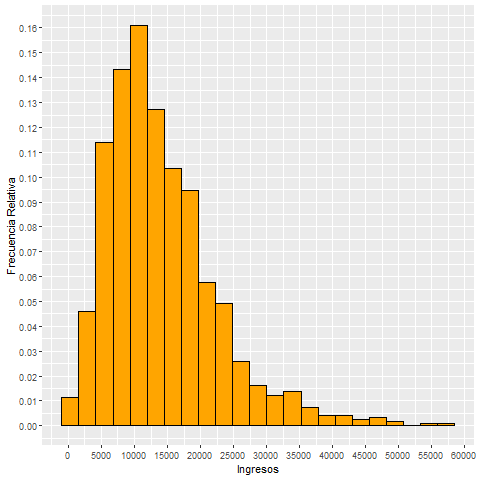

In [153]:
%%R

ggplot(data = data_R, aes(x=ingresos ))+
geom_histogram(aes(y = after_stat(count / sum(count))) , breaks=L , fill="orange", color="black")+
 scale_y_continuous( n.breaks = 15 )+
  scale_x_continuous(n.breaks = 12)+
  labs(x = "Ingresos",y = "Frecuencia Relativa")


Añadimos al histograma anterior lineas discontinuas verticales asociadas
a los valores de algunos estadisticos descriptivos:


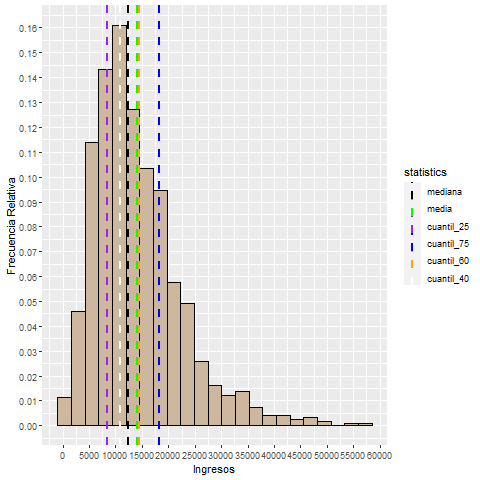

In [147]:
%%R

ggplot(data = data_R, aes(x=ingresos ))+
geom_histogram(aes(y = after_stat(count / sum(count))) , breaks=L , fill="bisque3", color="black")+
 scale_y_continuous( n.breaks = 15 )+
  scale_x_continuous(n.breaks = 12)+
  labs(x = "Ingresos", y = "Frecuencia Relativa")+
  
  geom_vline(aes(xintercept = median(ingresos),
                  color = "mediana"),
              linetype = "dashed",
              size = 1) +
   geom_vline(aes(xintercept = mean(ingresos),
                  color = "media"),
              linetype = "dashed",
              size = 1) +
   geom_vline(
     aes(xintercept = quantile(ingresos, 0.25),
         color = "cuantil_25"),
     linetype = "dashed",
     size = 1
   ) +
   geom_vline(
     aes(xintercept = quantile(ingresos, 0.75),
         color = "cuantil_75"),
     linetype = "dashed",
     size = 1
   ) +
 geom_vline(
     aes(xintercept = quantile(ingresos, 0.60),
         color = "cuantil_60"),
     linetype = "dashed",
     size = 1
   )+ 
  geom_vline(
     aes(xintercept = quantile(ingresos, 0.40),
         color = "cuantil_40"),
     linetype = "dashed",
     size = 1
   )+
   scale_color_manual(
     name = "statistics",
     values = c(
       mediana = "black",
       media = "green",
       cuantil_25 = "purple",
       cuantil_75 = "blue",
       cuantil_60="orange", cuantil_40="white"
     )
   ) 

## Histogram in Python:

In [277]:
 # pip install plotnine

In [183]:
from plotnine import ggplot, aes, geom_line, geom_point, geom_histogram, geom_bar, geom_boxplot, scale_y_continuous, scale_x_continuous, labs, after_stat


In [279]:
from mizani.formatters import percent_format 

ImportError: cannot import name 'count' from 'mizani.formatters' (c:\Users\Usuario\AppData\Local\R-MINI~1\lib\site-packages\mizani\formatters.py)

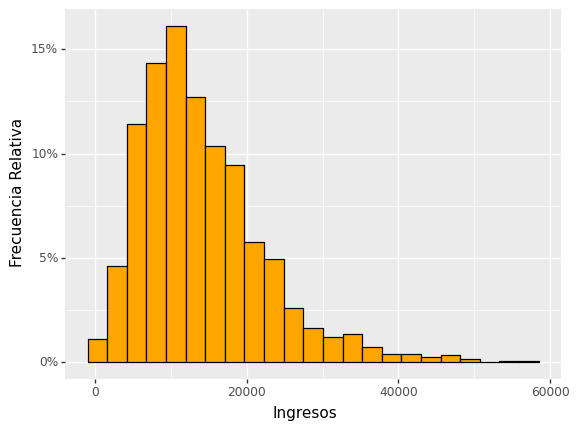

<ggplot: (130497329402)>

In [285]:
(
ggplot( data_Python )
+  aes(x='ingresos' , y =  after_stat('width*density'))
+ geom_histogram(breaks=L , fill="orange", color="black")

+  labs(x = "Ingresos", y = "Frecuencia Relativa")
+ scale_y_continuous(labels=percent_format() ) 
)